In [1]:
#Using NLP and Naive Bayes
#Natural language Toolkit

#Preprocessing NLP Data
- 1: Lowering the Format
- 2: Tokenization
- 3: Remove StopWords
- 4: Steaming/Lemitization
- 5: Spelling Correction
- 6: Removing Special Characters(Ex: #<)[{)

In [1]:
#!pip install autocorrect
#!pip install Wordcloud

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import matplotlib.pyplot as plt
from autocorrect import Speller
spell=Speller()
stemmer=PorterStemmer()
from wordcloud import WordCloud
import re
from tqdm import tqdm

In [3]:
data=pd.read_csv(r'E:/DataScience/SpamClassification/spam.csv')

In [4]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
#Drop the unwanted Data from the data Set
#axis=1 is for columns and axis=0 is by befault for rows
#inplace=True It modifies in the source of Data
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#Rename Column name
data.rename(columns={'v1':'labels','v2':'messages'},inplace=True)

In [8]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#Data Analysis of Spam words

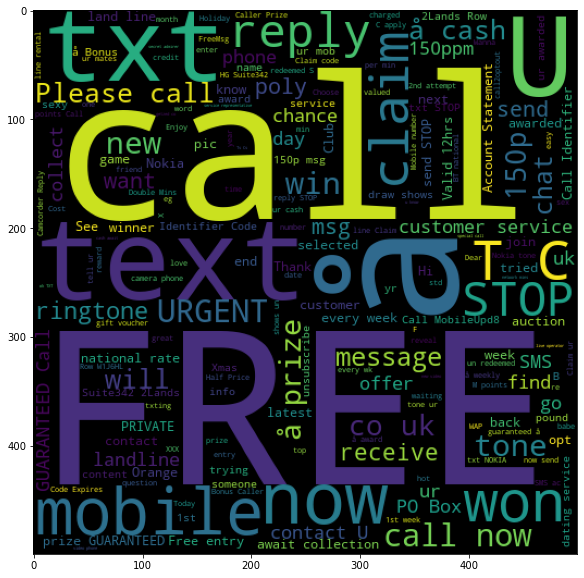

In [9]:
spam_words=' '.join(list(data[data['labels']=='spam']['messages']))
spam_wc=WordCloud(width=500,height=500).generate(spam_words)

plt.figure(figsize=(10,10))
plt.imshow(spam_wc)
plt.show()

#Data Analysis of Ham words

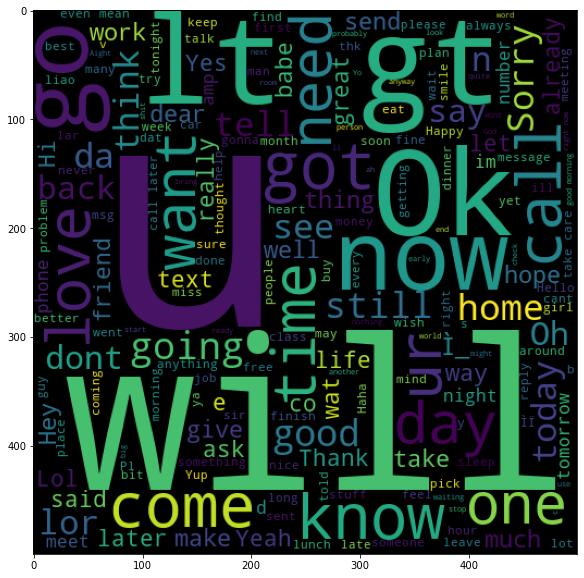

In [10]:
spam_words=' '.join(list(data[data['labels']=='ham']['messages']))
spam_wc=WordCloud(width=500,height=500).generate(spam_words)

plt.figure(figsize=(10,10))
plt.imshow(spam_wc)
plt.show()

#Understand NLP Preprocessing Data

#Tokenization
- My name is Mohit
- To break down the sentense into words or token is tokensization
- "My","name","is","Mohit"---->Tokensization of the sentense

#Removing Stopwords
- We should remove stop wrods from Sentences

In [11]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#Stemming 
- Convert your words into Root Wordds
- Ex: Palying,Plays, Played into Play
- Ex: Consultant, Consult, Consultants into Consult

In [12]:
#nltk.download('punkt')

In [13]:
data.shape

(5572, 2)

In [14]:
new_data=[]
for i in tqdm(range(data.shape[0])):
    lines=data.iloc[i,1]
    
    #removing non alphabatic characters
    lines=re.sub('[^A-Za-z]',' ',lines)
    
    # Lower the line
    lines=lines.lower()
    
    #tokeniztion
    tokenized_line=word_tokenize(lines)
    
    #removing stopwords, stemming and spell correction
    processed_lines=[]
    for i in tokenized_line:
        if i not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer.stem(i)))
            
    final_lines=''.join(processed_lines)
    new_data.append(final_lines)
    
    

100%|██████████████████████████████████████████████████████████████████████████████| 5572/5572 [08:30<00:00, 10.92it/s]


In [19]:
lines

'rofl  its true to its name'

In [18]:
tokenized_line

['rofl', 'its', 'true', 'to', 'its', 'name']

In [17]:
processed_lines

['roll', 'true', 'name']

In [16]:
len(new_data)
print(new_data[5571])

rolltruename


In [29]:
#Label Encoding
data['labels']=data['labels'].apply(lambda x:1 if x=='spam' else 0)
X=new_data
y=data['labels']

#Splitting Data into Train and Test

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [73]:
X_test

['urgenttricontactutodaydrawshowprizeguaranteecalllandlineclaimjpoboxcpm',
 'chargtransferchargwithdrawanyhowlike',
 'everydayusesleepltgt',
 'credittophttpwwwbubbletextcomrenewpintgxxrz',
 'homelovestillawaylovekiss',
 'gunmingdearhavniceday',
 'lolgrinbabethankthink',
 'everonefoot',
 'urlucklovesomeoneurfortuneloveoneloveu',
 'reachnotstop',
 'heywhatplansat',
 'cantkeeptalkpeoplesurepayarepricepltellwantreallybuymuchwillpay',
 'pickvariouspointgoevilmotorprojecthourutakehomemaxeast',
 'see',
 'sirreceiveaccountnothrtimesorrydelay',
 'freestodaydayreadhornlivetownlovesexfungamenetcollexltdppermsgreplystopend',
 'babelosttrireboot',
 'happenyodate',
 'conveyregard',
 'hahaawesomeminut',
 'finesimplysit',
 'japaneseproverboneunoneumustindianversiononeletnoneleadfinalkeralaversiononestopnonemakestrike',
 'sentpart',
 'mahbpicktomorrow',
 'bestlinesaidlovewaittilldayforgetudayurealizeuforgetgn',
 'heybookpilotyogalessonalreadyhaha',
 'purityfriendshiptwosmilereadforwardmessagesmileseena

In [33]:
X_train

['ucall',
 'telluheadachewantusehoursicktime',
 'nevertrialongtakeweighttearcomeurheartfallureyeawayrememberstupidfriendsharebslvyl',
 'rajplfavourplconveybirthdaywishnimapltodaybirthday',
 'timepro',
 'hikateloveseetonightillphonetomorrowgotsingguygavecardxxx',
 'usualiamfinehappyampwell',
 'notewatchtvhomegovbore',
 'psuurgrownright',
 'kwatthercid',
 'uawaysnow',
 'goodwonderwontsayhismilecopelongdistance',
 'intrepidduogreattimeseesoon',
 'gobyartcollege',
 'credittophttpwwwbubbletextcomrenewpintgxxrz',
 'thoughtputbackbox',
 'wntbuybmwcarurgentriurgenthvshortageltgtlacsourceangdiamtltgtlacthatpro',
 'himobilltgtadcontactlistwwwfullonsmcomgreatplacesendfreesmpeoplevisitfullonsmcom',
 'eastahsengotselectmeangood',
 'knowlackparticulardramastormdetailpartworry',
 'kkbus',
 'probablyearlierstationthink',
 'sorrymeetcalllater',
 'forwardhiparlboxmessagesmalertmatchpleascallbackretrievemessagematchccpmin',
 'gotnotjobonehostdataanalysissomestartmondaysurethesegotfinish',
 'freeentrygrpr

#Vectorization

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
matrix=CountVectorizer(lowercase=False)#Bag of words

In [76]:
X_train_Vect=matrix.fit_transform(X_train).toarray()
X_test_Vect=matrix.transform(X_test).toarray()

In [77]:
X_test_Vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

#Traning of Model Using Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [79]:
model=GaussianNB()

In [80]:
model.fit(X_train_Vect,y_train)

GaussianNB()

In [81]:
pred_data=model.predict(X_test_Vect)

In [82]:
model.classes_

array([0], dtype=int64)

In [83]:
ac_nb=accuracy_score(y_test,pred_data)
print(accuracy_score(y_test,pred_data)*100)

100.0


In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
confusion_matrix(y_test,pred_data)

array([[1393]], dtype=int64)